In [1]:
import pandas as pd
import numpy as np
import os.path as op
import seaborn as sns
import pingouin
import matplotlib.pyplot as plt

bids_folder = '/Users/mrenke/data/ds-dnumrisk'

In [ ]:
# neural data



In [ ]:
from numrisk.utils.data_02 import get_all_behavior

df_behav = get_all_behavior(bids_folder)
decod_r = pd.read_csv(op.join(bids_folder, 'derivatives', 'phenotype', 'decoding_r.csv')).set_index('subject').rename(columns={'r': 'decoding_R'})

df_comb = df_behav[['gamma', 'Percent Correct']].join(decod_r,on='subject')


In [75]:
df_risk = pd.read_csv(op.join(bids_folder, 'derivatives', 'phenotype', 'risk_all-params_probit-1_format-both.csv'))
df_risk = df_risk.set_index(['subject', 'format'])
df_risk = df_risk.unstack('format')
df_risk.columns = ['_'.join(col).strip() for col in df_risk.columns.values]
df_risk.head()

df_comb = df_risk.join(decod_r,on='subject').join(df_behav.reset_index()['group'],on='subject').set_index('group',append=True)


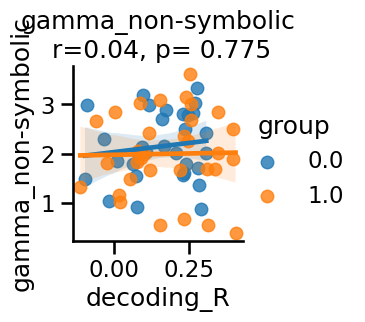

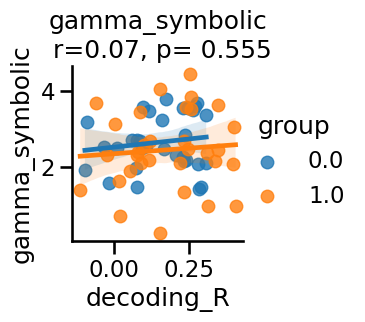

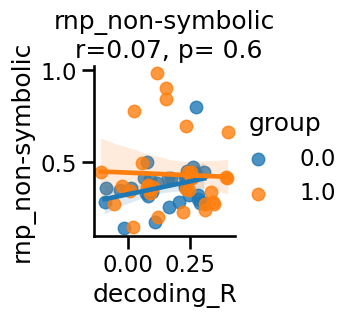

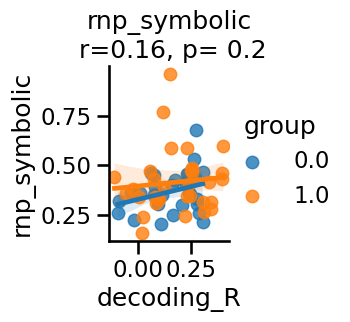

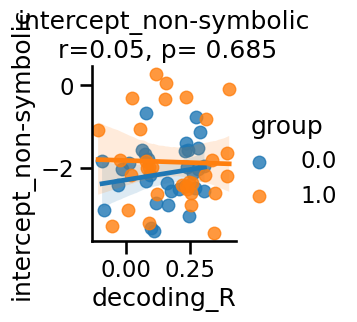

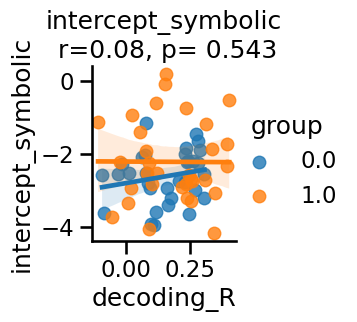

In [77]:
for y_var in df_risk.columns.to_list():
    cor = pingouin.corr(df_comb[x_var], df_comb[y_var], kind='shepard')
    r_ = np.round(cor['r'][0], 2)
    p = np.round(cor['p-val'][0], 3)

    sns.set_context('talk')
    fig = sns.lmplot(data=df_comb.reset_index(), x=x_var, y=y_var, hue='group', height=3)
    fig.set(title=f'{y_var}\n r={r_}, p= {p}') 

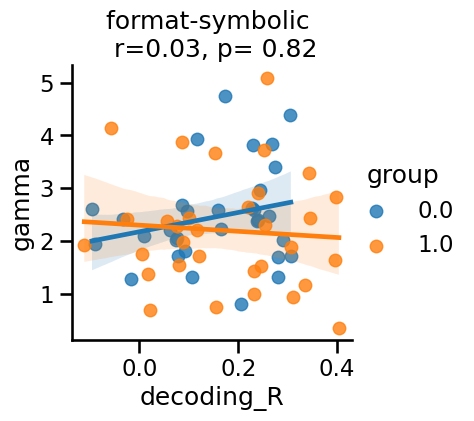

In [64]:
import pingouin as pg    

x_var = 'decoding_R'
y_var = 'gamma'
cor = pingouin.corr(df_comb[x_var], df_comb[y_var], kind='shepard')
r_ = np.round(cor['r'][0], 2)
p = np.round(cor['p-val'][0], 3)

sns.set_context('talk')
fig = sns.lmplot(data=df_comb.reset_index(), x=x_var, y=y_var, hue='group', height=4)
fig.set(title=f'format-{format} \n r={r_}, p= {p}') 

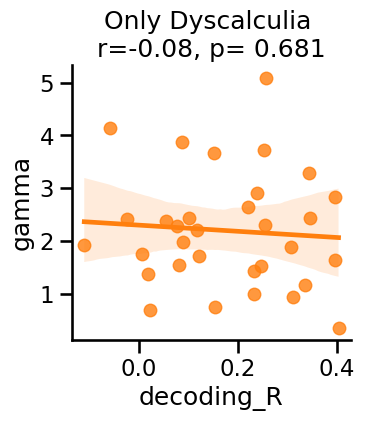

In [66]:
group = 1

tmp = df_comb.xs(group, level='group')
cor = pingouin.corr(tmp[x_var], tmp[y_var], kind='shepard')
r_ = np.round(cor['r'][0], 2)
p = np.round(cor['p-val'][0], 3)
fig = sns.lmplot(x=x_var, y=y_var, data=tmp.reset_index(),height=4,
    scatter_kws={'color': sns.color_palette()[group]},  # Second color in the palette
    line_kws={'color': sns.color_palette()[group]}     # Second color for the regression line
)
group = 'Dyscalculia' if group == 1 else 'Control'
fig.set(title=f'Only {group} \n r={r_}, p= {p} ') 

In [37]:
tmp

,gamma,Percent Correct,decoding_R
subject,,,
2,3.425356,88.257576,0.206071
4,4.930412,82.196970,-0.089840
6,4.335651,82.954545,0.062036
8,5.290764,83.333333,0.262900
11,2.878624,82.954545,0.078653
13,4.295870,79.545455,0.010607
16,3.696122,85.984848,0.307677
17,4.066487,77.272727,0.106925
22,4.003477,85.227273,0.239245
